# XGBoost
XGBoost (eXtreme Gradient Boosting) is an advanced implementation of the Gradient Boosting algorithm designed to be more efficient and performant. It incorporates several regularization techniques and offers faster computation through parallelization.

XGBoost Classifier:
Accuracy: 0.8
Confusion Matrix:
 [[7 0]
 [4 9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.69      0.82        13

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20



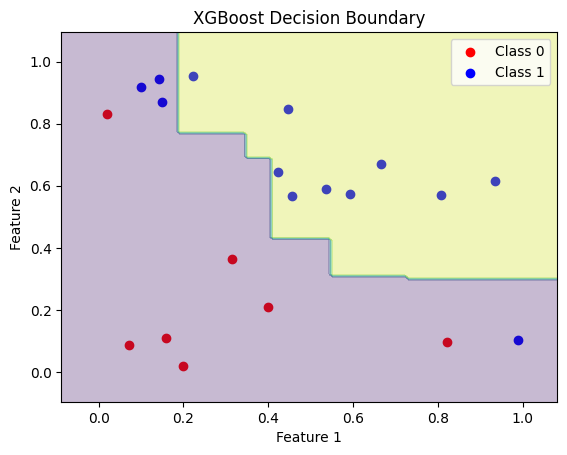

In [1]:
# XGBoost Classification Notebook

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate synthetic binary classification data
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples with 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Class 1 if the sum of the features is greater than 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,  # Number of trees (boosting rounds)
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,  # Maximum depth of each tree
    random_state=0
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
print("XGBoost Classifier:")
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", class_report_xgb)

# Visualize the decision boundary
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')

# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = xgb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.title('XGBoost Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Explanation of Code Components

1. **Data Generation**: Synthetic binary classification data is generated with two features.

2. **XGBoost Classifier**:
   - **n_estimators**: Number of boosting rounds (trees).
   - **learning_rate**: Controls how much each tree contributes to the final model. A smaller learning rate usually leads to better generalization but requires more trees.
   - **max_depth**: Maximum depth of each individual tree.

3. **Training**: The XGBoost model is trained on the training data using the `fit` method.

4. **Prediction**: The model predicts class labels on the test data.

5. **Evaluation**:
   - **Accuracy**: Proportion of correctly classified instances.
   - **Confusion Matrix**: Shows how well the model classified instances.
   - **Classification Report**: Provides precision, recall, and F1-score for each class.

6. **Visualization**: A contour plot is used to visualize the decision boundary of the XGBoost classifier. The decision regions for both classes are displayed.

### Key Features of XGBoost

- **Regularization**: XGBoost includes L1 and L2 regularization, which helps prevent overfitting.
- **Handling Missing Values**: XGBoost can handle missing values internally by learning which branch to follow for missing values.
- **Parallelization**: XGBoost can parallelize the construction of trees, making it faster than traditional gradient boosting.
- **Sparsity Awareness**: XGBoost is optimized to handle sparse data efficiently, which is useful for high-dimensional datasets.
- **Tree Pruning**: XGBoost uses a technique called "max-depth pruning," which stops the tree-building process once it is no longer improving the model's accuracy.

### XGBoost Parameters

- **`n_estimators`**: The number of trees or boosting rounds. More trees generally improve accuracy but can lead to overfitting if not controlled with regularization.
- **`learning_rate`**: A smaller value of `learning_rate` (like 0.01) requires more trees but may yield better performance.
- **`max_depth`**: Controls the complexity of the model. A higher `max_depth` allows for more complex decision boundaries but may lead to overfitting.
- **`gamma`**: The minimum loss reduction required to make a further partition on a leaf node.
- **`subsample`**: The fraction of samples used for fitting individual trees, used to introduce randomness.

### Benefits of XGBoost

- **Speed**: XGBoost is optimized for efficiency and can handle large datasets with faster training times.
- **Performance**: XGBoost often outperforms other algorithms due to its robustness to overfitting, regularization, and careful handling of the learning process.
- **Customizability**: XGBoost offers many hyperparameters for fine-tuning, giving users control over the model's behavior.

### Use Cases of XGBoost

- **Kaggle Competitions**: XGBoost has become a popular algorithm for many winning solutions.
- **Imbalanced Datasets**: With the right tuning of hyperparameters, XGBoost can handle class imbalances effectively.
- **Time-Series Forecasting**: It can be adapted to handle sequential data or regression problems.